# 📊 Aadhaar Biometric Update Analysis
## UIDAI Hackathon 2026 - Lifecycle Stress & Behaviour Analysis

**Objective:** Analyze biometric update patterns to identify lifecycle peaks, future infrastructure demand, and child-to-adult transition effects.

---

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

## 1. Data Loading & Initial Exploration

In [2]:
# Load all biometric update CSV files
data_path = Path('../data/biometric/')
csv_files = list(data_path.glob('*.csv'))

print(f"📁 Found {len(csv_files)} CSV files in biometric folder")
for f in csv_files:
    print(f"   - {f.name}")

# Concatenate all files
df_list = []
for file in csv_files:
    df_temp = pd.read_csv(file)
    df_list.append(df_temp)
    print(f"   ✅ {file.name}: {len(df_temp):,} rows")

df = pd.concat(df_list, ignore_index=True)
print(f"\n📊 Total records loaded: {len(df):,}")

📁 Found 4 CSV files in biometric folder
   - api_data_aadhar_biometric_1500000_1861108.csv
   - api_data_aadhar_biometric_1000000_1500000.csv
   - api_data_aadhar_biometric_500000_1000000.csv
   - api_data_aadhar_biometric_0_500000.csv


   ✅ api_data_aadhar_biometric_1500000_1861108.csv: 361,108 rows


   ✅ api_data_aadhar_biometric_1000000_1500000.csv: 500,000 rows


   ✅ api_data_aadhar_biometric_500000_1000000.csv: 500,000 rows


   ✅ api_data_aadhar_biometric_0_500000.csv: 500,000 rows

📊 Total records loaded: 1,861,108


In [3]:
# Data info and first look
print("\n📋 Dataset Info:")
print("=" * 50)
print(df.info())
print("\n📊 Column Names:")
print(df.columns.tolist())
print("\n📊 First 5 rows:")
df.head()


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB
None

📊 Column Names:
['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']

📊 First 5 rows:


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,08-12-2025,Uttar Pradesh,Moradabad,244411,4,2
1,08-12-2025,Uttar Pradesh,Moradabad,244601,14,19
2,08-12-2025,Uttar Pradesh,Muzaffarnagar,251002,22,37
3,08-12-2025,Uttar Pradesh,Muzaffarnagar,251202,4,4
4,08-12-2025,Uttar Pradesh,Muzaffarnagar,251319,4,7


In [4]:
# Rename columns for clarity
# bio_age_5_17: 5-17 years (children transitioning to adults)
# bio_age_17_: 17+ years (adults)
df.columns = ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_plus']
print("✅ Columns renamed for clarity")
df.head()

✅ Columns renamed for clarity


,date,state,district,pincode,bio_age_5_17,bio_age_17_plus
0,08-12-2025,Uttar Pradesh,Moradabad,244411,4,2
1,08-12-2025,Uttar Pradesh,Moradabad,244601,14,19
2,08-12-2025,Uttar Pradesh,Muzaffarnagar,251002,22,37
3,08-12-2025,Uttar Pradesh,Muzaffarnagar,251202,4,4
4,08-12-2025,Uttar Pradesh,Muzaffarnagar,251319,4,7


## 2. Data Cleaning & Transformation

In [5]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Extract time components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_year'] = df['date'].dt.to_period('M').astype(str)
df['quarter'] = df['date'].dt.quarter

# Calculate total biometric updates per row
df['total_bio_updates'] = df['bio_age_5_17'] + df['bio_age_17_plus']

# Standardize state names
df['state'] = df['state'].str.strip().str.title()
df['district'] = df['district'].str.strip().str.title()

print("✅ Data cleaned and transformed!")
print(f"\n📅 Date Range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"🗺️ States: {df['state'].nunique()}")
print(f"🏙️ Districts: {df['district'].nunique()}")

✅ Data cleaned and transformed!

📅 Date Range: 2025-03-01 to 2025-12-29
🗺️ States: 50


🏙️ Districts: 949


In [6]:
# Summary statistics
print("\n📈 Summary Statistics:")
df[['bio_age_5_17', 'bio_age_17_plus', 'total_bio_updates']].describe()


📈 Summary Statistics:


,bio_age_5_17,bio_age_17_plus,total_bio_updates
count,1.861108e+06,1.861108e+06,1.861108e+06
mean,1.839058e+01,1.909413e+01,3.748471e+01
std,8.370421e+01,8.806502e+01,1.623302e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.000000e+00
50%,3.000000e+00,4.000000e+00,8.000000e+00
75%,1.100000e+01,1.000000e+01,2.200000e+01
max,8.002000e+03,7.625000e+03,1.338100e+04


## 3. Understanding Biometric Updates

### Why Biometric Updates Happen:
1. **Child to Adult Transition (5-17 → 18+):** Fingerprints and iris patterns mature
2. **Natural Biometric Changes:** Age-related changes in adults
3. **Quality Issues:** Poor initial capture quality
4. **Mandatory Updates:** As per UIDAI guidelines (every 10 years for children)

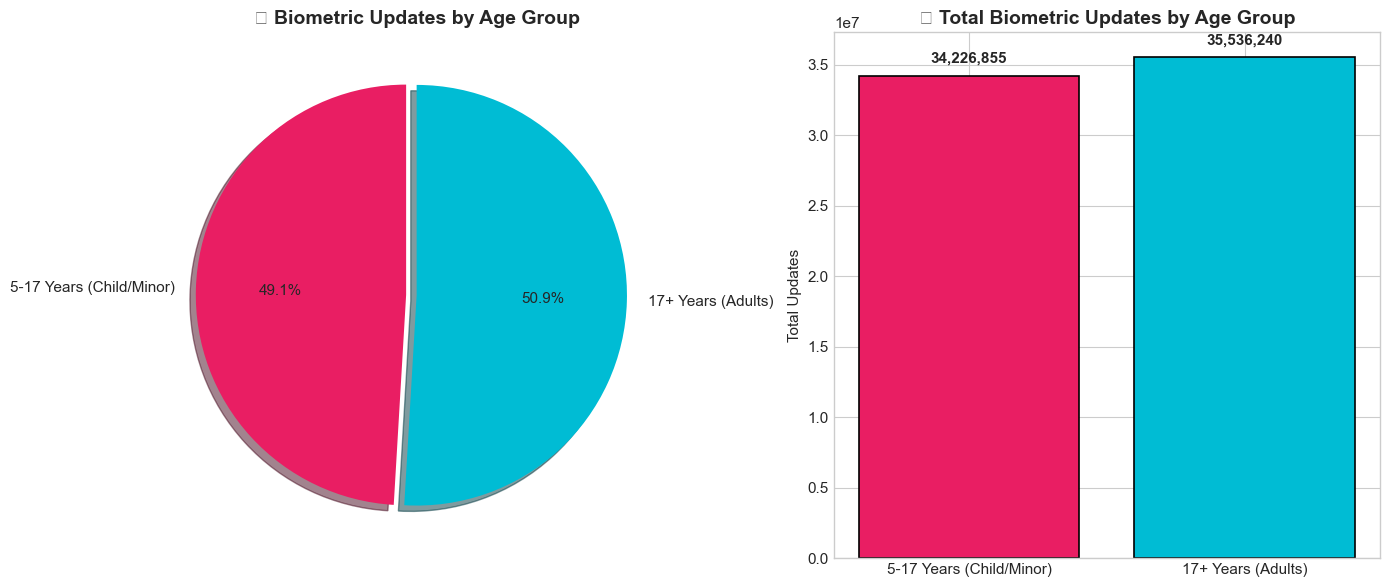


📋 Age Group Summary:
  5-17 Years (Child/Minor): 34,226,855 (49.1%)
  17+ Years (Adults): 35,536,240 (50.9%)

💡 KEY INSIGHT: 49.1% of biometric updates are from minors!
   This represents the CHILD → ADULT transition wave.


In [7]:
# Age group distribution for biometric updates
age_totals = {
    '5-17 Years (Child/Minor)': df['bio_age_5_17'].sum(),
    '17+ Years (Adults)': df['bio_age_17_plus'].sum()
}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors = ['#E91E63', '#00BCD4']
explode = (0.05, 0)
axes[0].pie(age_totals.values(), labels=age_totals.keys(), autopct='%1.1f%%',
           colors=colors, explode=explode, shadow=True, startangle=90)
axes[0].set_title('🎯 Biometric Updates by Age Group', fontsize=14, fontweight='bold')

# Bar chart with values
bars = axes[1].bar(age_totals.keys(), age_totals.values(), color=colors, edgecolor='black', linewidth=1.2)
axes[1].set_title('📊 Total Biometric Updates by Age Group', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Updates')
for bar, value in zip(bars, age_totals.values()):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02*max(age_totals.values()),
                f'{value:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/charts/biometric_age_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary
total = sum(age_totals.values())
print("\n📋 Age Group Summary:")
print("=" * 50)
for group, count in age_totals.items():
    print(f"  {group}: {count:,.0f} ({count/total*100:.1f}%)")

print(f"\n💡 KEY INSIGHT: {age_totals['5-17 Years (Child/Minor)']/total*100:.1f}% of biometric updates are from minors!")
print("   This represents the CHILD → ADULT transition wave.")

## 4. Temporal Analysis - Biometric Update Trends

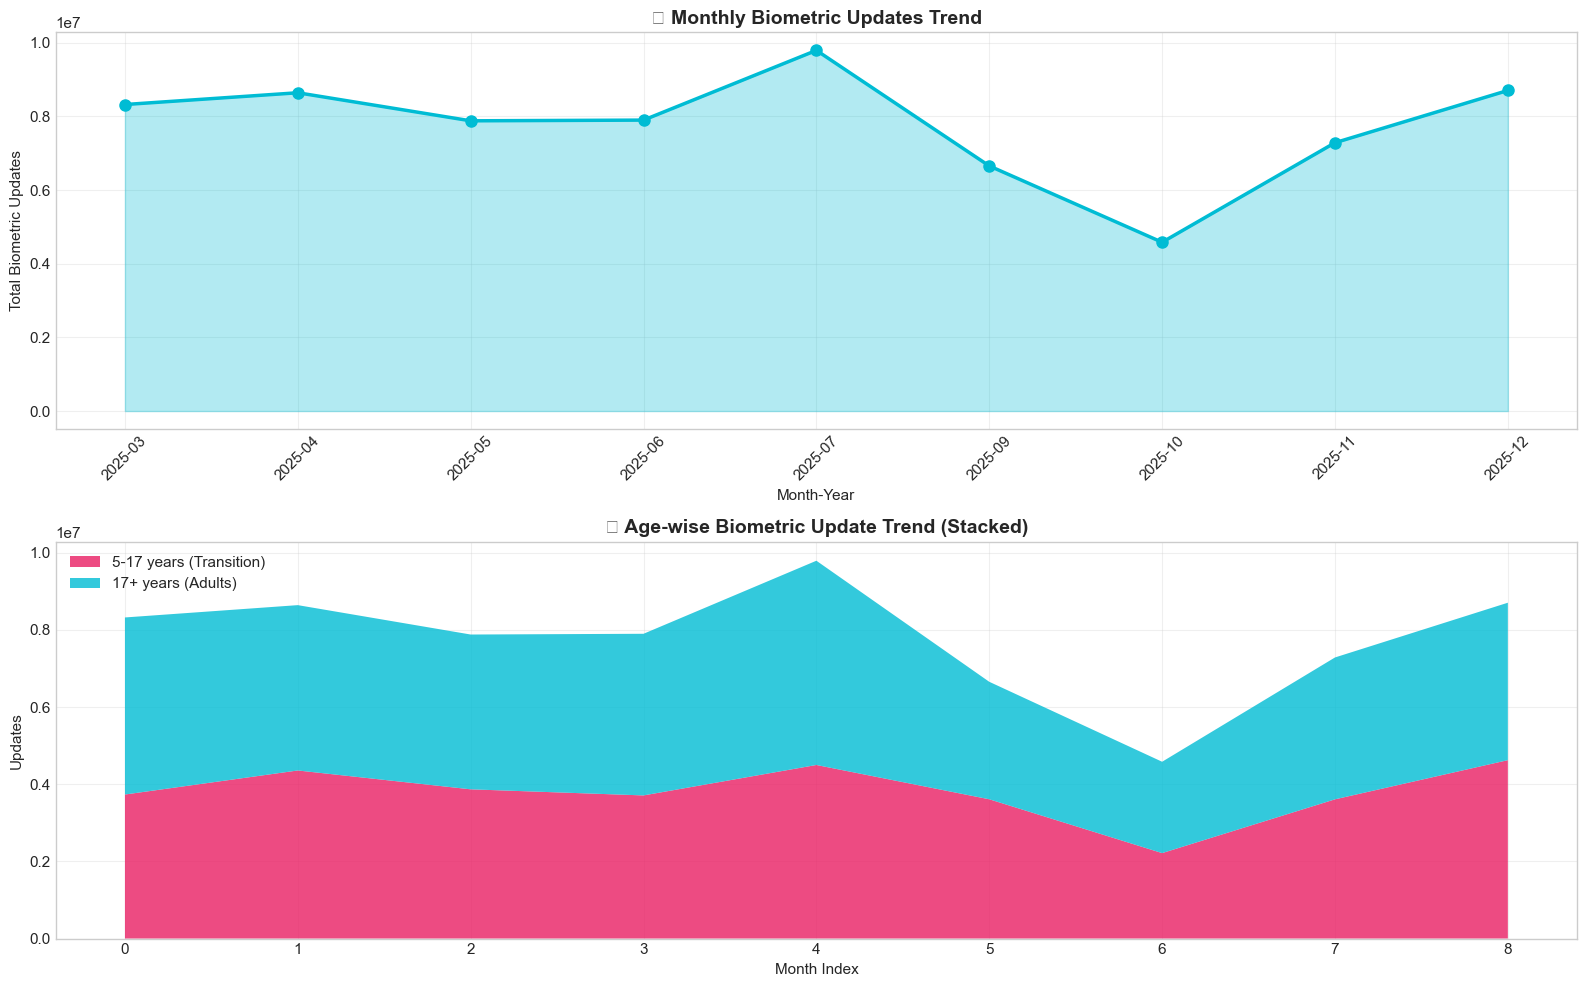

In [8]:
# Monthly biometric update trend
monthly_trend = df.groupby('month_year').agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_plus': 'sum',
    'total_bio_updates': 'sum'
}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Total update trend
axes[0].plot(monthly_trend['month_year'], monthly_trend['total_bio_updates'], 
             marker='o', linewidth=2.5, markersize=8, color='#00BCD4')
axes[0].fill_between(range(len(monthly_trend)), monthly_trend['total_bio_updates'], alpha=0.3, color='#00BCD4')
axes[0].set_title('📈 Monthly Biometric Updates Trend', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month-Year')
axes[0].set_ylabel('Total Biometric Updates')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Stacked area chart for age groups
axes[1].stackplot(range(len(monthly_trend)), 
                  monthly_trend['bio_age_5_17'], 
                  monthly_trend['bio_age_17_plus'],
                  labels=['5-17 years (Transition)', '17+ years (Adults)'],
                  colors=['#E91E63', '#00BCD4'], alpha=0.8)
axes[1].set_title('📊 Age-wise Biometric Update Trend (Stacked)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month Index')
axes[1].set_ylabel('Updates')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/charts/biometric_monthly_trend.png', dpi=150, bbox_inches='tight')
plt.show()

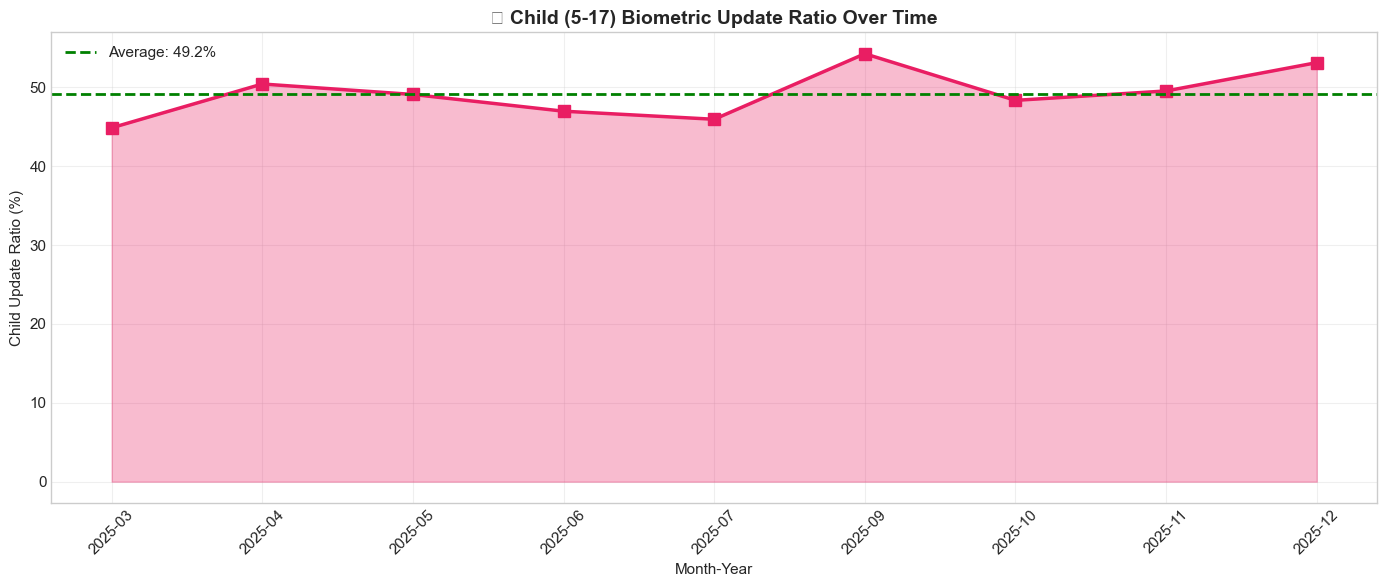


💡 INSIGHT: Consistent child biometric updates indicate ongoing transition wave
   Plan infrastructure for sustained biometric update demand


In [9]:
# Child transition ratio over time
monthly_trend['child_ratio'] = (monthly_trend['bio_age_5_17'] / monthly_trend['total_bio_updates']) * 100

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(monthly_trend['month_year'], monthly_trend['child_ratio'], 
       marker='s', linewidth=2.5, markersize=8, color='#E91E63')
ax.axhline(y=monthly_trend['child_ratio'].mean(), color='green', linestyle='--', 
          linewidth=2, label=f"Average: {monthly_trend['child_ratio'].mean():.1f}%")
ax.fill_between(range(len(monthly_trend)), monthly_trend['child_ratio'], alpha=0.3, color='#E91E63')
ax.set_title('📈 Child (5-17) Biometric Update Ratio Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Child Update Ratio (%)')
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/charts/biometric_child_ratio_trend.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 INSIGHT: Consistent child biometric updates indicate ongoing transition wave")
print("   Plan infrastructure for sustained biometric update demand")

## 5. State-wise Biometric Update Analysis

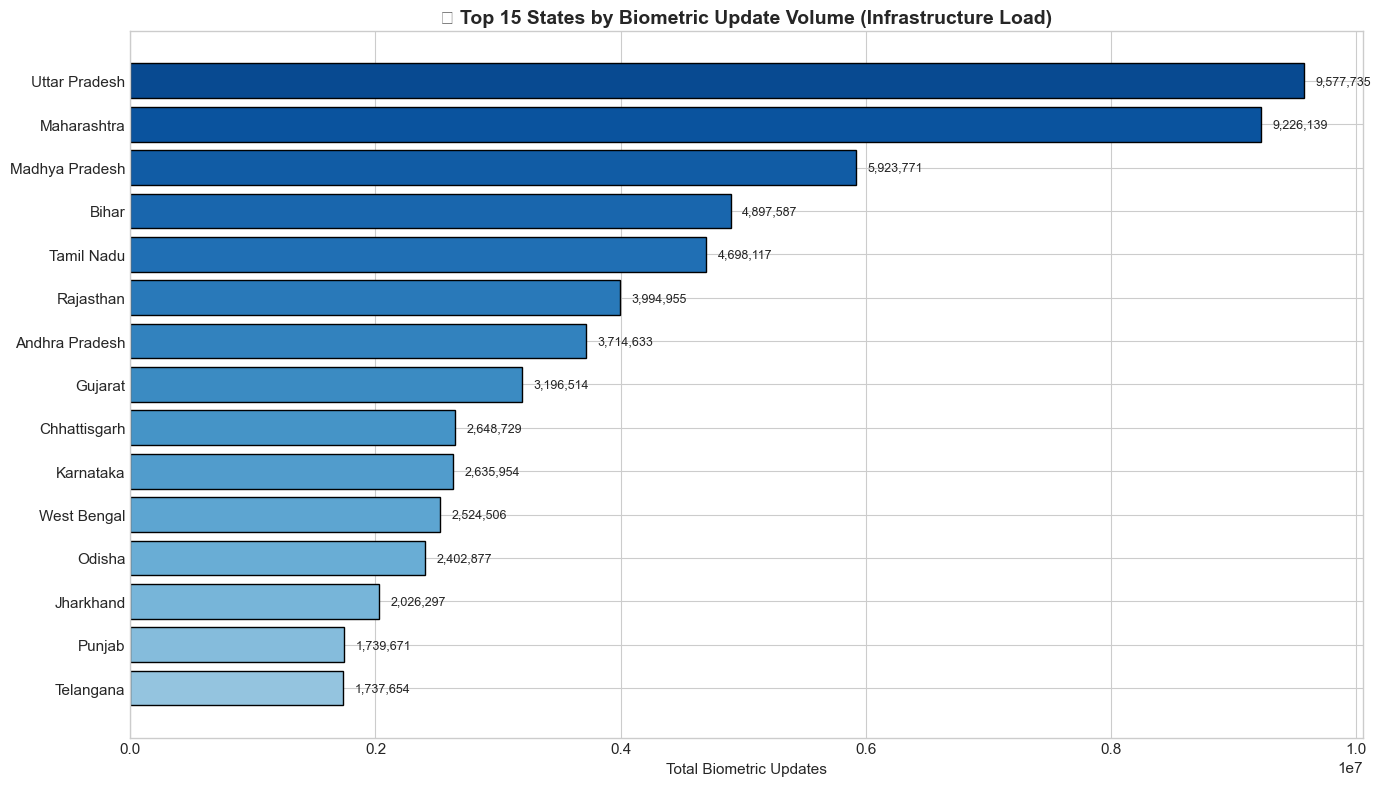

In [10]:
# State-wise total biometric updates
state_updates = df.groupby('state').agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_plus': 'sum',
    'total_bio_updates': 'sum'
}).reset_index().sort_values('total_bio_updates', ascending=False)

# Top 15 states by biometric load
top_states = state_updates.head(15)

fig, ax = plt.subplots(figsize=(14, 8))
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_states)))[::-1]

bars = ax.barh(top_states['state'], top_states['total_bio_updates'], color=colors, edgecolor='black')
ax.set_xlabel('Total Biometric Updates')
ax.set_title('🏆 Top 15 States by Biometric Update Volume (Infrastructure Load)', 
            fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for bar, value in zip(bars, top_states['total_bio_updates']):
    ax.text(value + 0.01*max(top_states['total_bio_updates']), bar.get_y() + bar.get_height()/2,
           f'{value:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../outputs/charts/biometric_top_states.png', dpi=150, bbox_inches='tight')
plt.show()

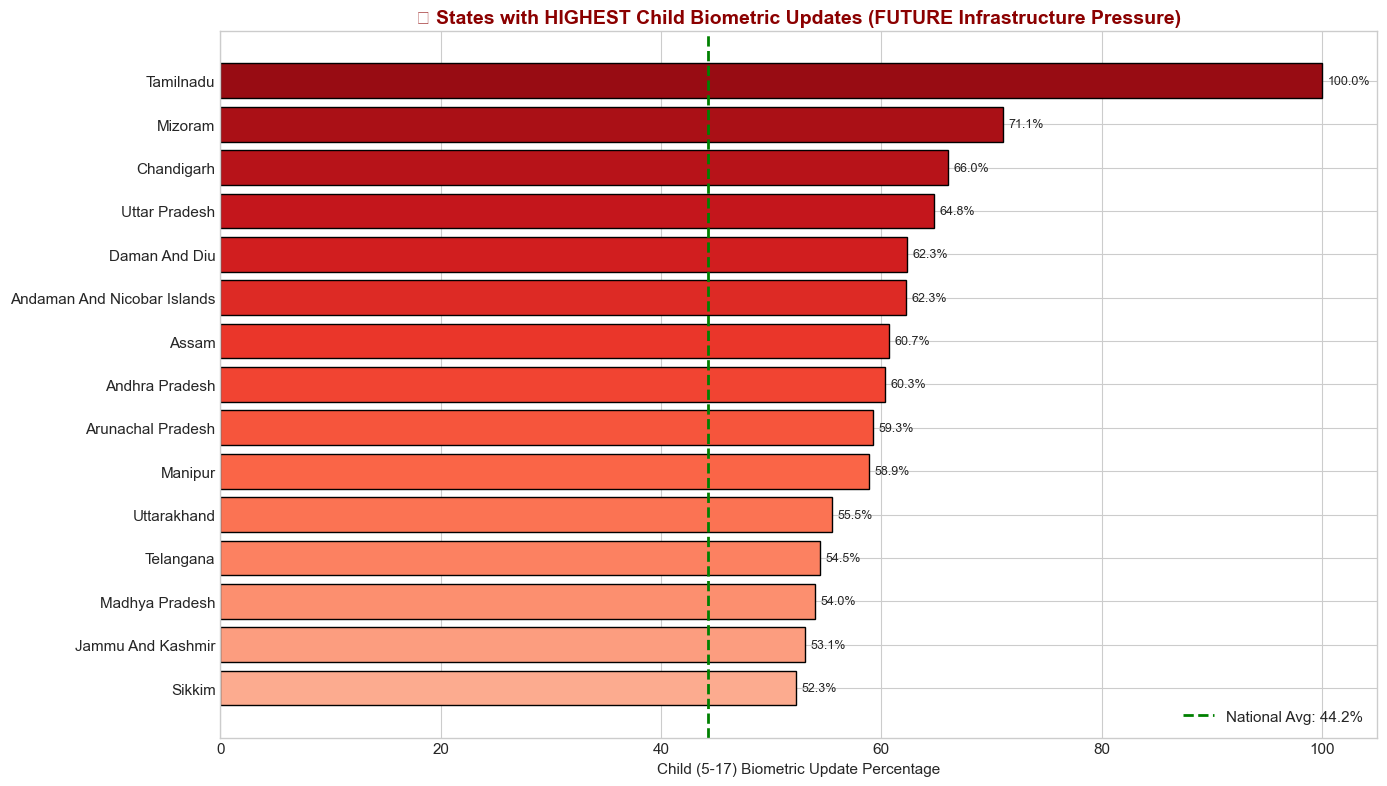


🚨 FUTURE INFRASTRUCTURE ALERT:
   These states have HIGH child biometric updates today.
   As these children turn 18, they will need MANDATORY updates.
   Plan infrastructure scaling NOW for 5-10 years ahead!


In [11]:
# Calculate child update percentage by state (future demand predictor)
state_updates['child_pct'] = (state_updates['bio_age_5_17'] / state_updates['total_bio_updates']) * 100

# States with highest child biometric updates (future pressure)
high_child_states = state_updates.nlargest(15, 'child_pct')

fig, ax = plt.subplots(figsize=(14, 8))
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(high_child_states)))[::-1]

bars = ax.barh(high_child_states['state'], high_child_states['child_pct'], color=colors, edgecolor='black')
ax.set_xlabel('Child (5-17) Biometric Update Percentage')
ax.set_title('🚨 States with HIGHEST Child Biometric Updates (FUTURE Infrastructure Pressure)', 
            fontsize=14, fontweight='bold', color='darkred')
ax.invert_yaxis()
ax.axvline(x=state_updates['child_pct'].mean(), color='green', linestyle='--', 
          linewidth=2, label=f"National Avg: {state_updates['child_pct'].mean():.1f}%")
ax.legend()

for bar, value in zip(bars, high_child_states['child_pct']):
    ax.text(value + 0.5, bar.get_y() + bar.get_height()/2, f'{value:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../outputs/charts/biometric_future_pressure_states.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🚨 FUTURE INFRASTRUCTURE ALERT:")
print("   These states have HIGH child biometric updates today.")
print("   As these children turn 18, they will need MANDATORY updates.")
print("   Plan infrastructure scaling NOW for 5-10 years ahead!")

## 6. Future Demand Forecasting (Simple Projection)

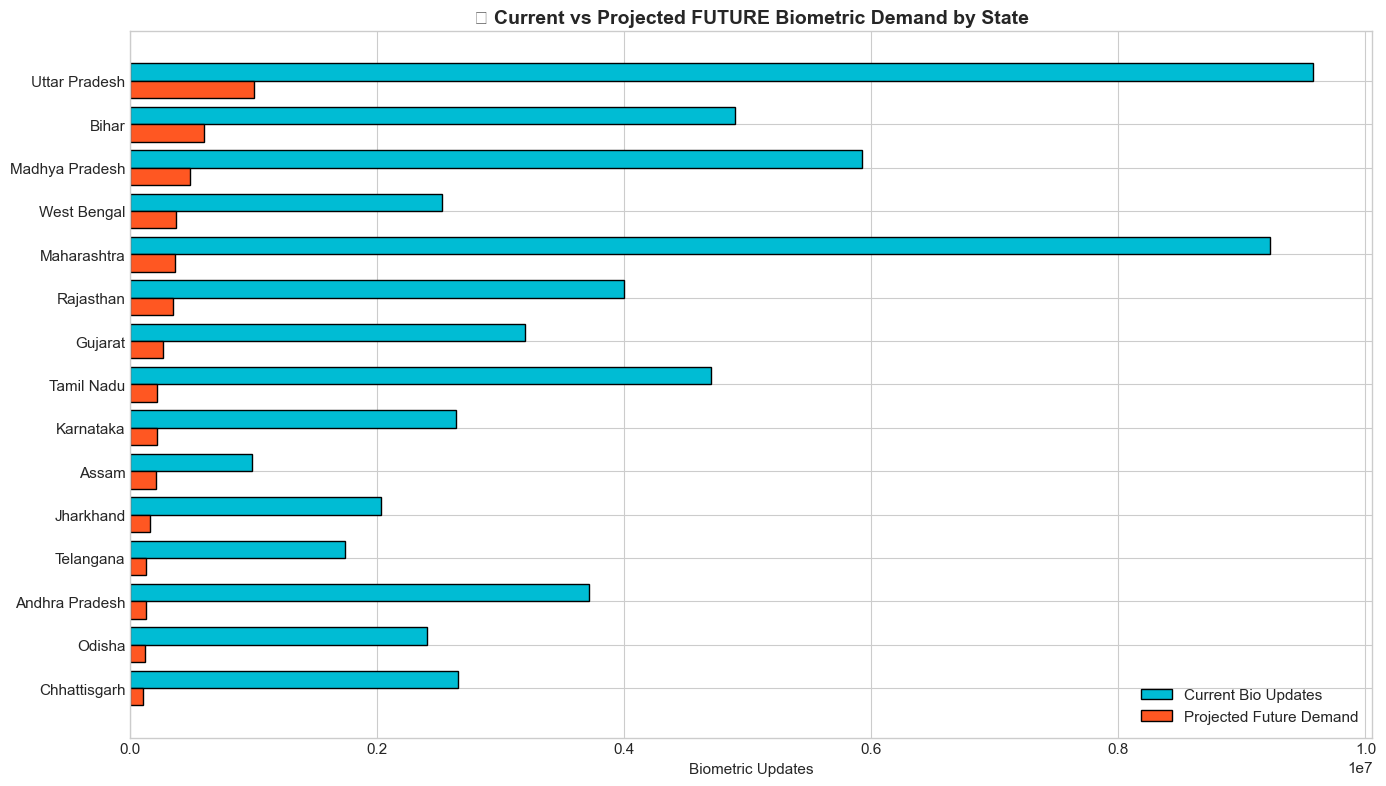


📊 PROJECTION METHODOLOGY:
   Today's child enrolments (0-17) = Future biometric updates (as they mature)
   This is a simplified LINEAR projection based on current data


In [12]:
# Simple projection: Children enrolled today = biometric updates in 5-10 years
# Current child updates indicate the pipeline

# Load enrolment data for comparison
enrolment_path = Path('../data/enrolment/')
enrol_files = list(enrolment_path.glob('*.csv'))
enrol_df = pd.concat([pd.read_csv(f) for f in enrol_files], ignore_index=True)

# State-wise child enrolment
enrol_df['state'] = enrol_df['state'].str.strip().str.title()
enrol_by_state = enrol_df.groupby('state').agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum'
}).reset_index()
enrol_by_state['total_child_enrol'] = enrol_by_state['age_0_5'] + enrol_by_state['age_5_17']

# Merge with biometric data
future_demand = state_updates.merge(enrol_by_state[['state', 'total_child_enrol']], on='state', how='left')
future_demand['future_bio_demand'] = future_demand['total_child_enrol']  # Today's child = tomorrow's bio update

# Top states by future demand
future_top = future_demand.nlargest(15, 'future_bio_demand')

fig, ax = plt.subplots(figsize=(14, 8))

x = range(len(future_top))
width = 0.4

bars1 = ax.barh([i-width/2 for i in x], future_top['total_bio_updates'], width, 
               label='Current Bio Updates', color='#00BCD4', edgecolor='black')
bars2 = ax.barh([i+width/2 for i in x], future_top['future_bio_demand'], width, 
               label='Projected Future Demand', color='#FF5722', edgecolor='black')

ax.set_yticks(x)
ax.set_yticklabels(future_top['state'])
ax.set_xlabel('Biometric Updates')
ax.set_title('📈 Current vs Projected FUTURE Biometric Demand by State', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../outputs/charts/biometric_future_demand.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 PROJECTION METHODOLOGY:")
print("   Today's child enrolments (0-17) = Future biometric updates (as they mature)")
print("   This is a simplified LINEAR projection based on current data")

## 7. District-Level Biometric Hotspots

In [13]:
# District-wise biometric load
district_bio = df.groupby(['state', 'district']).agg({
    'total_bio_updates': 'sum',
    'bio_age_5_17': 'sum',
    'bio_age_17_plus': 'sum'
}).reset_index()

# Top 20 hotspot districts
hotspot_districts = district_bio.nlargest(20, 'total_bio_updates')

print("\n🔥 TOP 20 BIOMETRIC HOTSPOT DISTRICTS:")
print("=" * 80)
for _, row in hotspot_districts.iterrows():
    child_pct = (row['bio_age_5_17'] / row['total_bio_updates']) * 100
    print(f"  {row['district']}, {row['state']}: {row['total_bio_updates']:,.0f} updates | Child: {child_pct:.1f}%")


🔥 TOP 20 BIOMETRIC HOTSPOT DISTRICTS:
  Pune, Maharashtra: 605,762 updates | Child: 46.8%
  Nashik, Maharashtra: 576,606 updates | Child: 37.0%
  Thane, Maharashtra: 571,273 updates | Child: 35.5%
  Jalgaon, Maharashtra: 417,384 updates | Child: 35.7%
  Ahmedabad, Gujarat: 405,490 updates | Child: 40.9%
  Mumbai, Maharashtra: 404,359 updates | Child: 29.6%
  Ahmadnagar, Maharashtra: 363,561 updates | Child: 45.2%
  Jaipur, Rajasthan: 355,884 updates | Child: 44.5%
  Nagpur, Maharashtra: 350,923 updates | Child: 32.2%
  Kurnool, Andhra Pradesh: 350,633 updates | Child: 69.3%
  Nanded, Maharashtra: 342,540 updates | Child: 36.4%
  Amravati, Maharashtra: 338,283 updates | Child: 30.6%
  Solapur, Maharashtra: 334,507 updates | Child: 46.2%
  Yavatmal, Maharashtra: 327,187 updates | Child: 28.3%
  North West Delhi, Delhi: 325,293 updates | Child: 41.1%
  Aurangabad, Maharashtra: 311,373 updates | Child: 35.4%
  Visakhapatnam, Andhra Pradesh: 311,303 updates | Child: 62.8%
  East Godavari, 

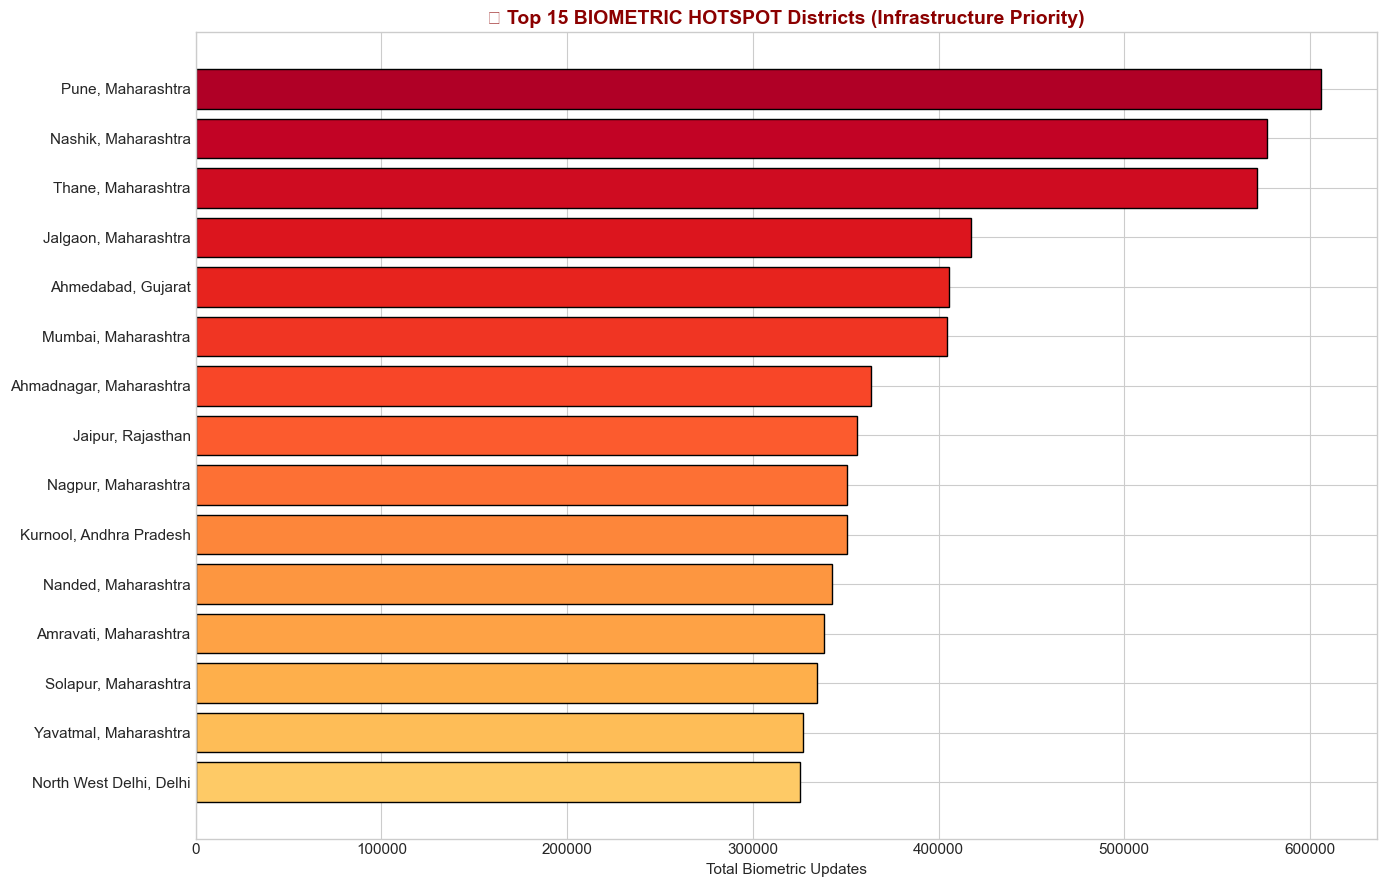

In [14]:
# Visualize hotspot districts
top_districts = hotspot_districts.head(15)
top_districts['label'] = top_districts['district'] + ', ' + top_districts['state']

fig, ax = plt.subplots(figsize=(14, 9))
colors = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(top_districts)))[::-1]

bars = ax.barh(top_districts['label'], top_districts['total_bio_updates'], color=colors, edgecolor='black')
ax.set_xlabel('Total Biometric Updates')
ax.set_title('🔥 Top 15 BIOMETRIC HOTSPOT Districts (Infrastructure Priority)', 
            fontsize=14, fontweight='bold', color='darkred')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../outputs/charts/biometric_hotspot_districts.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Biometric Infrastructure Pressure Score

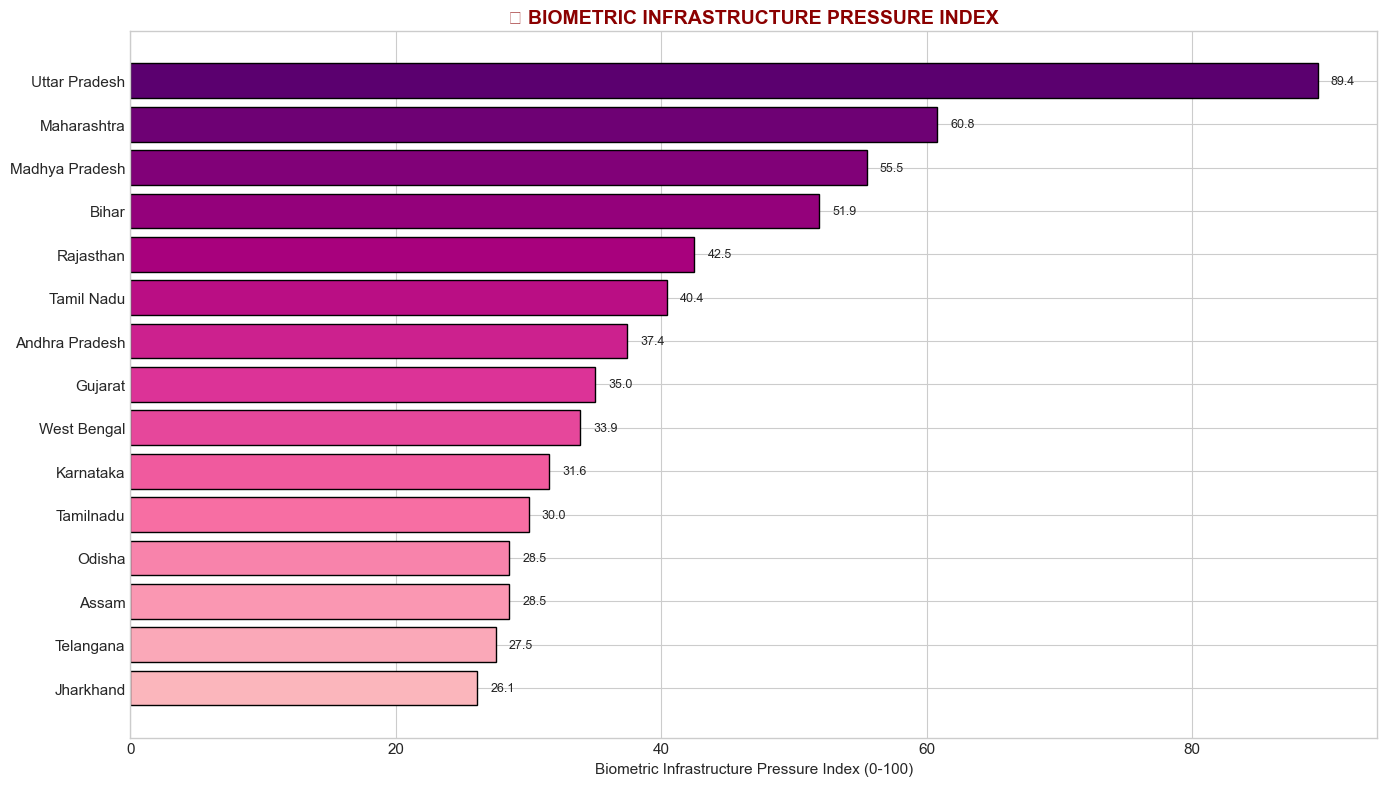


📊 PRESSURE INDEX COMPONENTS:
   - Volume Score (40%): Current biometric update load
   - Child Score (30%): Current child updates (5-17 age group)
   - Future Score (30%): Projected demand from child enrolments


In [15]:
# Create a Biometric Pressure Index for states
# Factors: Current volume, Child ratio (future pressure), Growth trend

# Calculate month-over-month growth
state_monthly = df.groupby(['state', 'month_year'])['total_bio_updates'].sum().reset_index()
state_monthly = state_monthly.sort_values(['state', 'month_year'])
state_monthly['growth'] = state_monthly.groupby('state')['total_bio_updates'].pct_change() * 100
avg_growth = state_monthly.groupby('state')['growth'].mean().reset_index()
avg_growth.columns = ['state', 'avg_growth']

# Merge metrics
state_pressure = state_updates.merge(avg_growth, on='state', how='left')
state_pressure = state_pressure.merge(future_demand[['state', 'future_bio_demand']], on='state', how='left')
state_pressure = state_pressure.fillna(0)

# Normalize metrics (0-100 scale)
state_pressure['volume_score'] = (state_pressure['total_bio_updates'] / state_pressure['total_bio_updates'].max()) * 100
state_pressure['child_score'] = (state_pressure['child_pct'] / state_pressure['child_pct'].max()) * 100
state_pressure['future_score'] = (state_pressure['future_bio_demand'] / state_pressure['future_bio_demand'].max()) * 100

# Composite Biometric Pressure Index
state_pressure['pressure_index'] = (state_pressure['volume_score'] * 0.4 + 
                                     state_pressure['child_score'] * 0.3 + 
                                     state_pressure['future_score'] * 0.3)

# Top 15 pressure states
high_pressure = state_pressure.nlargest(15, 'pressure_index')

fig, ax = plt.subplots(figsize=(14, 8))
colors = plt.cm.RdPu(np.linspace(0.3, 0.95, len(high_pressure)))[::-1]

bars = ax.barh(high_pressure['state'], high_pressure['pressure_index'], color=colors, edgecolor='black')
ax.set_xlabel('Biometric Infrastructure Pressure Index (0-100)')
ax.set_title('🚨 BIOMETRIC INFRASTRUCTURE PRESSURE INDEX', fontsize=14, fontweight='bold', color='darkred')
ax.invert_yaxis()

for bar, value in zip(bars, high_pressure['pressure_index']):
    ax.text(value + 1, bar.get_y() + bar.get_height()/2, f'{value:.1f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../outputs/charts/biometric_pressure_index.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 PRESSURE INDEX COMPONENTS:")
print("   - Volume Score (40%): Current biometric update load")
print("   - Child Score (30%): Current child updates (5-17 age group)")
print("   - Future Score (30%): Projected demand from child enrolments")

## 9. Summary Table Generation

In [16]:
# Create comprehensive state summary
state_summary = df.groupby('state').agg({
    'total_bio_updates': 'sum',
    'bio_age_5_17': 'sum',
    'bio_age_17_plus': 'sum',
    'district': 'nunique',
    'pincode': 'nunique'
}).reset_index()

state_summary.columns = ['State', 'Total_Bio_Updates', 'Bio_Age_5_17', 'Bio_Age_17_Plus', 'Districts', 'Pincodes']
state_summary['Child_Ratio_%'] = (state_summary['Bio_Age_5_17'] / state_summary['Total_Bio_Updates'] * 100).round(1)
state_summary['Adult_Ratio_%'] = (state_summary['Bio_Age_17_Plus'] / state_summary['Total_Bio_Updates'] * 100).round(1)
state_summary = state_summary.sort_values('Total_Bio_Updates', ascending=False)

# Merge with pressure index
pressure_subset = state_pressure[['state', 'pressure_index']]
pressure_subset.columns = ['State', 'Pressure_Index']
state_summary = state_summary.merge(pressure_subset, on='State', how='left')
state_summary['Pressure_Index'] = state_summary['Pressure_Index'].round(1)

# Save to CSV
state_summary.to_csv('../outputs/summary_tables/biometric_state_summary.csv', index=False)
print("✅ State summary saved to outputs/summary_tables/biometric_state_summary.csv")

# Display top states
print("\n📊 STATE-WISE BIOMETRIC UPDATE SUMMARY (Top 15):")
state_summary.head(15)

✅ State summary saved to outputs/summary_tables/biometric_state_summary.csv

📊 STATE-WISE BIOMETRIC UPDATE SUMMARY (Top 15):


,State,Total_Bio_Updates,Bio_Age_5_17,Bio_Age_17_Plus,Districts,Pincodes,Child_Ratio_%,Adult_Ratio_%,Pressure_Index
0,Uttar Pradesh,9577735,6207105,3370630,90,1753,64.8,35.2,89.4
1,Maharashtra,9226139,3512712,5713427,52,1607,38.1,61.9,60.8
2,Madhya Pradesh,5923771,3200117,2723654,60,797,54.0,46.0,55.5
3,Bihar,4897587,2208141,2689446,46,917,45.1,54.9,51.9
4,Tamil Nadu,4698117,2227252,2470865,45,2088,47.4,52.6,40.4
5,Rajasthan,3994955,2066747,1928208,45,986,51.7,48.3,42.5
6,Andhra Pradesh,3714633,2241467,1473166,45,1847,60.3,39.7,37.4
7,Gujarat,3196514,1460655,1735859,39,1026,45.7,54.3,35.0
8,Chhattisgarh,2648729,884553,1764176,40,269,33.4,66.6,24.1
9,Karnataka,2635954,1244999,1390955,53,1353,47.2,52.8,31.6


## 10. Key Findings & Policy Insights

In [17]:
# Generate key insights
print("\n" + "="*70)
print("📋 KEY FINDINGS - AADHAAR BIOMETRIC UPDATE ANALYSIS")
print("="*70)

total_updates = df['total_bio_updates'].sum()
child_updates = df['bio_age_5_17'].sum()
adult_updates = df['bio_age_17_plus'].sum()

print(f"\n✅ TOTAL BIOMETRIC UPDATES: {total_updates:,.0f}")
print(f"   - Children/Minors (5-17): {child_updates:,.0f} ({child_updates/total_updates*100:.1f}%)")
print(f"   - Adults (17+): {adult_updates:,.0f} ({adult_updates/total_updates*100:.1f}%)")

print(f"\n📍 GEOGRAPHIC COVERAGE:")
print(f"   - States/UTs: {df['state'].nunique()}")
print(f"   - Districts: {df['district'].nunique()}")
print(f"   - Pincodes: {df['pincode'].nunique()}")

# Top infrastructure pressure states
top_pressure = high_pressure.head(5)['state'].tolist()
print(f"\n🚨 HIGHEST BIOMETRIC PRESSURE STATES: {', '.join(top_pressure)}")

# High future demand states
high_future = high_child_states.head(5)['state'].tolist()
print(f"\n📈 HIGH FUTURE DEMAND STATES (Child Transitions): {', '.join(high_future)}")

print("\n" + "="*70)
print("📌 POLICY RECOMMENDATIONS:")
print("="*70)
print("""
1. INFRASTRUCTURE SCALING (Immediate):
   - Upgrade biometric capture devices in high-pressure states
   - Add dedicated biometric update counters in busy centers
   - Deploy mobile biometric units for rural areas

2. CHILD TRANSITION MANAGEMENT (5-Year Plan):
   - School-based biometric update camps (Class 10/12)
   - Pre-scheduled appointments for turning-18 cohorts
   - Awareness campaigns about mandatory updates

3. TECHNOLOGY ENHANCEMENT:
   - Adopt latest fingerprint/iris capture technology
   - Reduce update failures with better hardware
   - Enable partial biometric updates (flexible scheduling)

4. RESOURCE ALLOCATION:
   - Budget planning based on pressure index
   - Staff training and certification programs
   - Equipment maintenance schedules

5. MONITORING FRAMEWORK:
   - Real-time biometric load dashboards
   - Alert systems for capacity breach
   - Quality metrics for capture accuracy
""")


📋 KEY FINDINGS - AADHAAR BIOMETRIC UPDATE ANALYSIS

✅ TOTAL BIOMETRIC UPDATES: 69,763,095
   - Children/Minors (5-17): 34,226,855 (49.1%)
   - Adults (17+): 35,536,240 (50.9%)

📍 GEOGRAPHIC COVERAGE:
   - States/UTs: 50


   - Districts: 949
   - Pincodes: 19707

🚨 HIGHEST BIOMETRIC PRESSURE STATES: Uttar Pradesh, Maharashtra, Madhya Pradesh, Bihar, Rajasthan

📈 HIGH FUTURE DEMAND STATES (Child Transitions): Tamilnadu, Mizoram, Chandigarh, Uttar Pradesh, Daman And Diu

📌 POLICY RECOMMENDATIONS:

1. INFRASTRUCTURE SCALING (Immediate):
   - Upgrade biometric capture devices in high-pressure states
   - Add dedicated biometric update counters in busy centers
   - Deploy mobile biometric units for rural areas

2. CHILD TRANSITION MANAGEMENT (5-Year Plan):
   - School-based biometric update camps (Class 10/12)
   - Pre-scheduled appointments for turning-18 cohorts
   - Awareness campaigns about mandatory updates

3. TECHNOLOGY ENHANCEMENT:
   - Adopt latest fingerprint/iris capture technology
   - Reduce update failures with better hardware
   - Enable partial biometric updates (flexible scheduling)

4. RESOURCE ALLOCATION:
   - Budget planning based on pressure index
   - Staff training and certification pr

In [18]:
# Save key metrics for combined analysis
key_metrics = {
    'total_bio_updates': total_updates,
    'child_bio_updates': child_updates,
    'adult_bio_updates': adult_updates,
    'child_pct': child_updates/total_updates*100,
    'states': df['state'].nunique(),
    'districts': df['district'].nunique(),
    'date_range': f"{df['date'].min().date()} to {df['date'].max().date()}"
}

pd.DataFrame([key_metrics]).to_csv('../outputs/summary_tables/biometric_key_metrics.csv', index=False)
print("\n✅ Key metrics saved for combined analysis!")


✅ Key metrics saved for combined analysis!


---
### 📊 End of Biometric Analysis Notebook
**Next:** Proceed to `04_combined_insights.ipynb`